<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/CURVA_DE_JUROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=JmpZQAIDboo


In [4]:
pip install investpy

     |████████████████████████████████| 4.4MB 7.7MB/s 
     |████████████████████████████████| 245kB 37.1MB/s 
     |████████████████████████████████| 6.3MB 44.4MB/s 
     |████████████████████████████████| 512kB 36.0MB/s 
  Created wheel for investpy: filename=investpy-1.0.6-cp37-none-any.whl size=4485151 sha256=cf24b9a6f9bcab081c37e8ec98f73ca82651a19d7a5c185619312a43462d33b7
  Stored in directory: /root/.cache/pip/wheels/13/5f/65/a9e30255faec3c0b7dd11b40fa1042c61c5b0cfbbb9797c474
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [5]:
import investpy as inv
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns; sns.set()

In [6]:
import plotly.graph_objects as go

In [7]:
matplotlib.rcParams['figure.figsize'] = (16,5)

In [8]:
fundos_br = inv.get_funds_list('brazil')

In [9]:
bonds_br = inv.get_bonds_list(country='brazil')

In [10]:
bonds_br

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [11]:
bonds_overview = inv.get_bonds_overview('brazil')

In [12]:
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,3.845,3.764,3.782,3.757,+0.081,+2.14%
1,brazil,Brazil 6M,4.478,4.435,4.475,4.430,+0.043,+0.96%
2,brazil,Brazil 9M,5.148,5.115,5.100,5.060,+0.033,+0.64%
3,brazil,Brazil 1Y,5.577,5.590,5.685,5.565,-0.013,-0.23%
4,brazil,Brazil 2Y,7.199,7.575,7.585,7.535,-0.377,-4.97%
5,brazil,Brazil 3Y,7.426,7.955,7.985,7.930,-0.529,-6.65%
6,brazil,Brazil 5Y,8.209,8.325,8.235,8.235,-0.116,-1.39%
7,brazil,Brazil 8Y,8.818,8.910,9.235,8.860,-0.092,-1.03%
8,brazil,Brazil 10Y,9.417,9.495,9.455,9.455,-0.078,-0.82%


In [13]:
bonds_overview.head(3)

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,3.845,3.764,3.782,3.757,+0.081,+2.14%
1,brazil,Brazil 6M,4.478,4.435,4.475,4.430,+0.043,+0.96%
2,brazil,Brazil 9M,5.148,5.115,5.100,5.060,+0.033,+0.64%


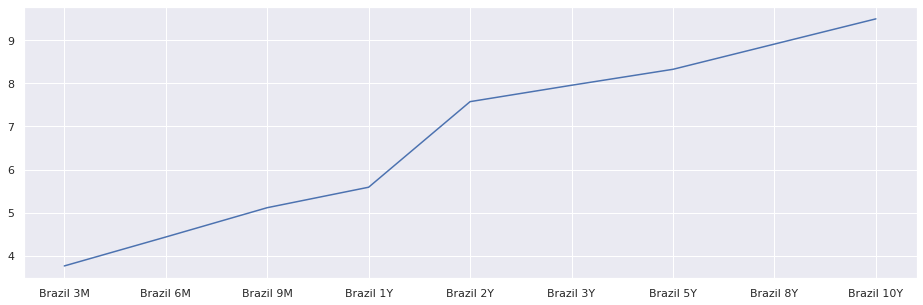

In [14]:
plt.plot(bonds_br, bonds_overview['last_close'])

In [15]:
data_ini = '01/01/2010'
data_fim = '01/05/2021'
um_ano = inv.get_bond_historical_data('Brazil 1y', from_date=data_ini, to_date=data_fim)

In [16]:
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2021-04-26,5.180,5.180,5.170,5.170
2021-04-27,5.180,5.180,5.120,5.120
2021-04-28,5.195,5.195,5.145,5.145


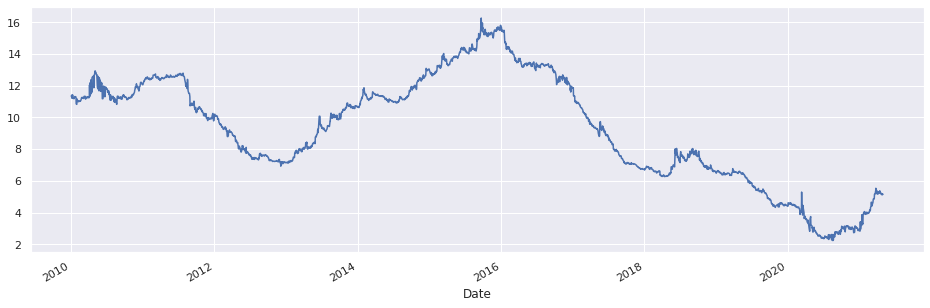

In [17]:
um_ano['Close'].plot()

In [18]:
data_ini = '01/01/2010'
data_fim = '01/05/2021'
bonds = pd.DataFrame()

In [19]:
for prazo in bonds_br:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_ini, to_date=data_fim)['Close']

In [20]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-26,3.501,4.182,4.760,5.170,6.995,7.460,7.905,8.510,9.145
2021-04-27,3.538,4.155,4.725,5.120,6.995,7.395,7.860,8.450,9.100
2021-04-28,3.552,4.170,4.735,5.145,7.045,7.450,7.810,8.880,9.075


In [21]:
bonds.index = pd.to_datetime(bonds.index)

In [22]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-26,3.501,4.182,4.760,5.170,6.995,7.460,7.905,8.510,9.145
2021-04-27,3.538,4.155,4.725,5.120,6.995,7.395,7.860,8.450,9.100
2021-04-28,3.552,4.170,4.735,5.145,7.045,7.450,7.810,8.880,9.075


In [23]:
bonds.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-04-19', '2021-04-20', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=1474, freq=None)

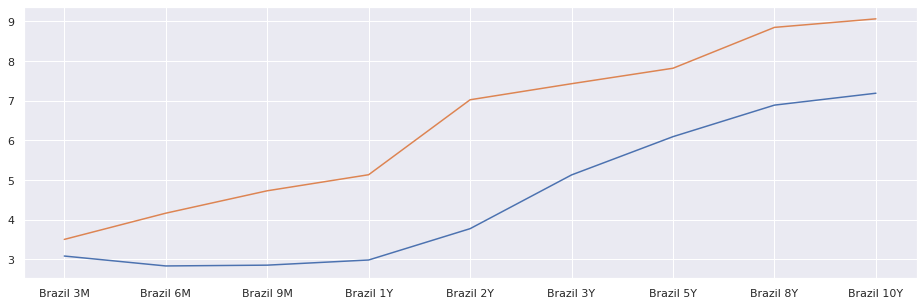

In [24]:
plt.plot(bonds_br, bonds.loc['2020-04-23'].values)
plt.plot(bonds_br, bonds.loc['2021-04-23'].values)

In [29]:
fig = go.Figure()
for i in bonds.index:
  fig.add_trace(go.Scatter(x=bonds_br, y=bonds.loc[i], mode='lines', name=str(i)))

fig.show()